# O-halophosphinobenzeneとphosphineの反応についての立体的考察

In [11]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

from io import StringIO
from rdkit import rdBase, Chem
from rdkit.Chem import AllChem, Draw
from rdkit.Chem.Draw import IPythonConsole
from IPython.display import SVG

## Sterimol parameter

https://mfa-catalysis.com/descriptor_calculations/

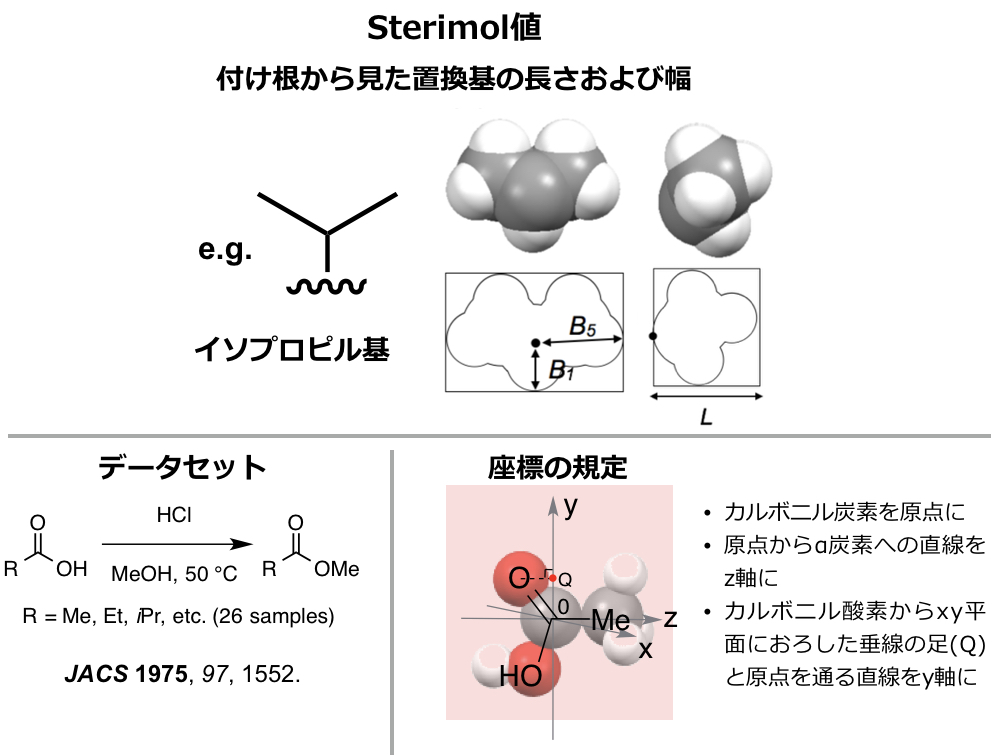

Sterimol parameter : 置換基の最大、最小の幅と置換基の長さからなる3次元の記述子

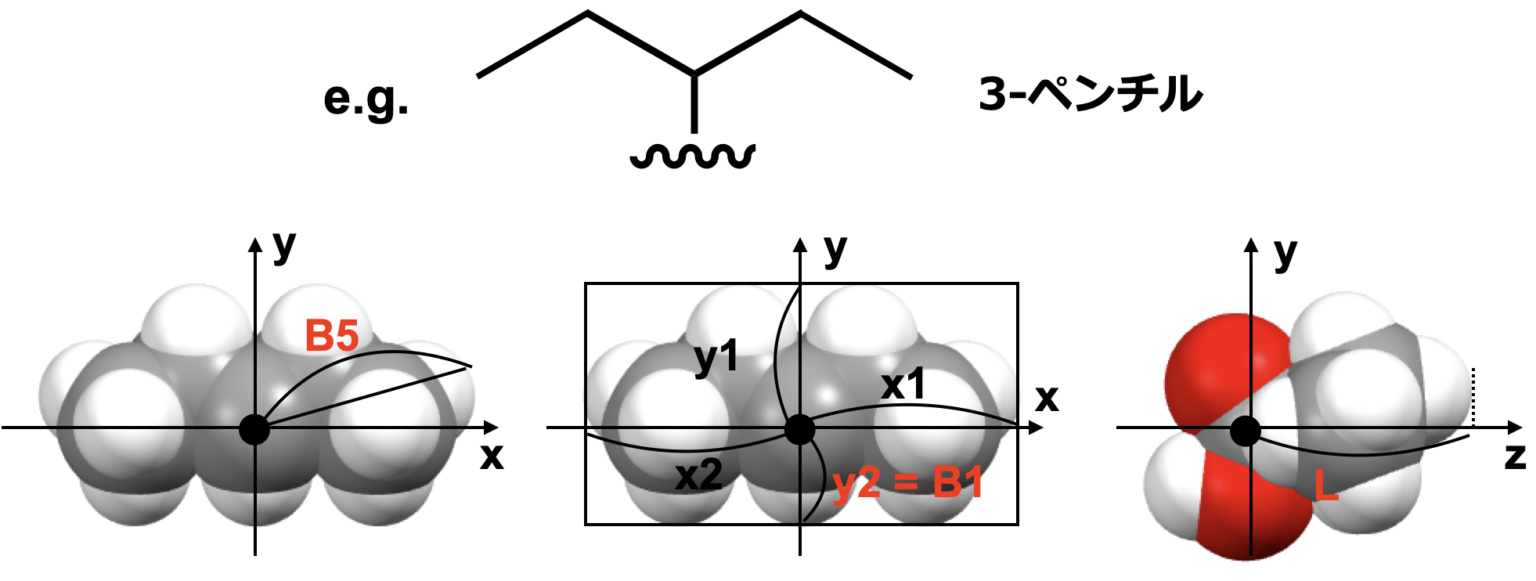

## phosphinobenzeneのSterimol記述子の計算

・　リン原子を原点におく. 

・　リンに結合している対象の置換基の炭素との結合をx軸上に置く.

・　この炭素と結合している隣接する炭素あるいは水素をxy平面内に置く.

・　最大の幅は、単純にyz平面上に射影した置換基上の原子の原点からの距離を測り、その最大のもの(B5)

・　最小の幅は、y1,y2,z1,z2の長さのうち最も小さいもの(B1)

・　長さは原点から最も遠い原子のx座標(L)

### 長さ L を測る

14i_R2を例に

In [6]:
# xyzファイルのパス
xyz_file_path = './xyzfiles'
xyz_file_name = '14i_R2.xyz'

# xyzファイルからrdkitのmolオブジェクトを生成
mol = Chem.rdmolfiles.MolFromXYZFile(xyz_file_path + '/14i_R2.xyz')

# 3D座標を2D座標に変換
AllChem.Compute2DCoords(mol)

# 2D座標を描画
Chem.Draw.MolToImage(mol)
 

AttributeError: module 'rdkit.Chem' has no attribute 'Draw'

In [3]:


# xyzファイルをpandasのデータフレームに読み込む
df_xyz = pd.read_table(f'{xyz_file_path}/14i_R2.xyz',
                   sep=r'\s+', 
                   skiprows=2,
                   header=None, 
                   names=["elements", "x", "y", "z"])

# yz平面上に射影した置換基上の原子の原点からの距離
df_xyz["y2+z2"] = (df_xyz["y"])**2 + (df_xyz["z"])**2

# Display the DataFrame
display(df_xyz)

,elements,x,y,z,y2+z2
0,Cl,-0.301190,-2.129300,-0.307749,4.628628
1,P,0.000000,0.000000,0.000000,0.000000
2,C,1.952166,0.000000,0.000000,0.000000
3,H,-0.264935,0.407049,-1.291712,1.834209
4,C,2.604304,-0.701118,-1.227459,1.998222
5,C,2.435083,-0.638573,1.337579,2.196893
6,H,2.223073,1.071591,0.000000,1.148307
7,H,3.696185,-0.743645,-1.088344,1.737501
8,H,2.225191,-1.729846,-1.326039,4.750747
9,H,2.399879,-0.156202,-2.160485,4.692095


In [4]:
# 原子のファンデルワールス半径 (単位: Å)
vdw_radii = {
    'H': 1.20, 'C': 1.70, 'O': 1.52, 'F': 1.47, 'P': 1.80, 'Cl': 1.75,
}

### 長さ(L)

In [5]:
# x座標のなかから正の最大値を抽出し、そのファンデルワールス半径を足す.

# x座標の正の最大値を持つ元素
element_max_x = df_xyz.iloc[df_xyz['x'].idxmax(), 0]

# xの正の最大値を取得して長さLを得る
max_x = df_xyz['x'].max()
L = max_x + vdw_radii.get(element_max_x)
print(L)

4.896185


### 最小および最大の幅を算出する (B1 および B5)

In [6]:
# 最大の幅(B5)はx列が負の値でない原子の中で"y2+z2"の値が最大なもの

df_B5 = df_xyz[df_xyz['x'] > 0]

# y2+z2"の最大値を持つ元素
element_max_y2z2 = df_xyz.iloc[df_B5['y2+z2'].idxmax(), 0]

# y2+z2"の最大値を取得して最大の幅(B5)を得る
max_y2z2 = df_B5['y2+z2'].max()
B5 = math.sqrt(max_y2z2) + vdw_radii.get(element_max_y2z2)
print(B5)

3.4036670279604406


In [7]:
# 最小の幅(B1)はx列が負の値でない炭素原子以外の原子の中で"y2+z2"の値が最小なもの

df_B1 = df_xyz.loc[(df_xyz['x'] > 0) & (df_xyz['elements'] != "C")]

# y2+z2"の最小値を持つ元素
element_min_y2z2 = df_xyz.iloc[df_B1['y2+z2'].idxmin(), 0]

# y2+z2"の最小値を取得して最小の幅(B1)を得る
max_y2z2 = df_B1['y2+z2'].min()
B1 = math.sqrt(max_y2z2) + vdw_radii.get(element_min_y2z2)
print(B1)

2.271591


In [8]:
element_min_y2z2

'H'

### 角度と結合長

In [9]:
# P-Clの結合長さ

x_Cl = df_xyz[df_xyz["elements"] == "Cl"]["x"].values[0]
y_Cl = df_xyz[df_xyz["elements"] == "Cl"]["y"].values[0]
z_Cl = df_xyz[df_xyz["elements"] == "Cl"]["z"].values[0]

bond_length_Cl = math.sqrt((x_Cl**2) + (y_Cl**2) + (z_Cl**2))

In [10]:
# 結合角度

# Define the coordinates
p_row = df_xyz[df_xyz['elements'] == 'P'][['x', 'y', 'z']]
cl_row = df_xyz[df_xyz['elements'] == 'Cl'][['x', 'y', 'z']]
c_row = df_xyz[(df_xyz['elements'] == 'C') & \
                (df_xyz['y'] == 0.000000) & \
                (df_xyz['z'] == 0.000000)][['x', 'y', 'z']]
h_row = df_xyz[(df_xyz['elements'] == 'H') & \
                (df_xyz['x'] < 0)][['x', 'y', 'z']]

# Convert the row to a numpy array
p = np.array(p_row.iloc[0])
cl = np.array(cl_row.iloc[0])
c = np.array(c_row.iloc[0])
h = np.array(h_row.iloc[0])

# Calculate vectors
u = cl - p
v = c - p
t = h - p

# Calculate dot product
dot_product_1 = np.dot(u, v)
dot_product_2 = np.dot(t, v)


# Calculate magnitudes
magnitude_u = np.linalg.norm(u)
magnitude_v = np.linalg.norm(v)
magnitude_t = np.linalg.norm(t)

# Calculate cosine of the angle
cos_theta_1 = dot_product_1 / (magnitude_u * magnitude_v)
cos_theta_2 = dot_product_2 / (magnitude_t * magnitude_v)

# Calculate the angle in degrees
angle_degrees_1 = np.degrees(np.arccos(cos_theta_1))
angle_degrees_2 = np.degrees(np.arccos(cos_theta_2))

print(angle_degrees_1)
print(angle_degrees_2)

97.96936361221788
101.06846929182589


In [11]:
# まとめて関数を作る

def sterimol_phos(ligand_code,
                  xyz_file,
                  txt_name):

    # xyzファイルをpandasのデータフレームに読み込む
    df_xyz = pd.read_table(xyz_file,
                    sep=r'\s+', 
                    skiprows=2,
                    header=None, 
                    names=["elements", "x", "y", "z"])

    # yz平面上に射影した置換基上の原子の原点からの距離
    df_xyz["y2+z2"] = (df_xyz["y"])**2 + (df_xyz["z"])**2

    # x座標の正の最大値を持つ元素
    element_max_x = df_xyz.iloc[df_xyz['x'].idxmax(), 0]

    # xの正の最大値を取得して長さLを得る
    max_x = df_xyz['x'].max()
    L = max_x + vdw_radii.get(element_max_x)

    # 最大の幅(B5)はx列が負の値でない原子の中で"y2+z2"の値が最大なもの
    df_B5 = df_xyz[df_xyz['x'] > 0]

    # y2+z2"の最大値を持つ元素
    element_max_y2z2 = df_xyz.iloc[df_B5['y2+z2'].idxmax(), 0]

    # y2+z2"の最大値を取得して最大の幅(B5)を得る
    max_y2z2 = df_B5['y2+z2'].max()
    B5 = math.sqrt(max_y2z2) + vdw_radii.get(element_max_y2z2)

    # 最小の幅(B1)はx列が負の値でない炭素原子以外の原子の中で"y2+z2"の値が最小なもの
    df_B1 = df_xyz.loc[(df_xyz['x'] > 0) & (df_xyz['elements'] != "C")]

    # y2+z2"の最小値を持つ元素
    element_min_y2z2 = df_xyz.iloc[df_B1['y2+z2'].idxmin(), 0]

    # y2+z2"の最小値を取得して最小の幅(B1)を得る
    max_y2z2 = df_B1['y2+z2'].min()
    B1 = math.sqrt(max_y2z2) + vdw_radii.get(element_min_y2z2)

    if "Cl" in list(df_xyz["elements"]):
        w = 'Cl'
    elif "O" in list(df_xyz["elements"]):
        w = 'O'
    elif "Li" in list(df_xyz["elements"]):
        w = 'Li'
 
    
    # P-Clの結合長さ
    x_w = df_xyz[df_xyz["elements"] == w]["x"].values[0]
    y_w = df_xyz[df_xyz["elements"] == w]["y"].values[0]
    z_w = df_xyz[df_xyz["elements"] == w]["z"].values[0]

    bond_length_w = math.sqrt((x_w**2) + (y_w**2) + (z_w**2))

    # 結合角度

    # Define the coordinates
    p_row = df_xyz[df_xyz['elements'] == 'P'][['x', 'y', 'z']]
    w_row = df_xyz[df_xyz['elements'] == w][['x', 'y', 'z']]
    c_row = df_xyz[(df_xyz['elements'] == 'C') & \
                    (df_xyz['y'] == 0.000000) & \
                    (df_xyz['z'] == 0.000000)][['x', 'y', 'z']]
    h_row = df_xyz[(df_xyz['elements'] == 'H') & \
                    (df_xyz['x'] < 0)][['x', 'y', 'z']]

    # Convert the row to a numpy array
    p = np.array(p_row.iloc[0])
    w = np.array(w_row.iloc[0])
    c = np.array(c_row.iloc[0])
    h = np.array(h_row.iloc[0])

    # Calculate vectors
    u = cl - p
    v = c - p
    t = h - p

    # Calculate dot product
    dot_product_1 = np.dot(u, v)
    dot_product_2 = np.dot(t, v)


    # Calculate magnitudes
    magnitude_u = np.linalg.norm(u)
    magnitude_v = np.linalg.norm(v)
    magnitude_t = np.linalg.norm(t)

    # Calculate cosine of the angle
    cos_theta_1 = dot_product_1 / (magnitude_u * magnitude_v)
    cos_theta_2 = dot_product_2 / (magnitude_t * magnitude_v)

    # Calculate the angle in degrees
    angle_degrees_1 = np.degrees(np.arccos(cos_theta_1))
    angle_degrees_2 = np.degrees(np.arccos(cos_theta_2))

    if ligand_code == "14a_R2":
        f = open(txt_name,'w')
        f.write("ligand_code"+\
                '\t'+"L"+'\t'+"B1"+'\t'+"B5"+'\t'+\
                "Pwbond_length"+'\t'+"wPC_Angle"+'\t'+"CPC_Angle"+'\n')
        f.write(ligand_code+'\t'+str(round(L,2))+'\t'+str(round(B1,2))+'\t'+\
                str(round(B5,2))+'\t'+str(round(bond_length_Cl,2))+'\t'+str(round(angle_degrees_1,2))\
                    +'\t'+str(round(angle_degrees_2,2))+'\n')
        f.close
    elif ligand_code != "14a_R2":
        f = open(txt_name,'a')
        f.write(ligand_code+'\t'+str(round(L,2))+'\t'+str(round(B1,2))+'\t'+\
                str(round(B5,2))+'\t'+str(round(bond_length_Cl,2))+'\t'+str(round(angle_degrees_1,2))\
                    +'\t'+str(round(angle_degrees_2,2))+'\n')
        f.close

In [12]:
xyz_file_path = './xyzfiles'

for n in range(14, 16):
    for i in range(97, 106):
        for j in range(2, 4):
            ligand_code = f'{n}{chr(i)}_R{j}'
            xyz_file = f'{xyz_file_path}/{ligand_code}.xyz'
            txt_name = "Sterimol_Phos.txt"

            try:
                sterimol_phos(ligand_code, xyz_file, txt_name)
            except FileNotFoundError:
                pass
            

In [13]:
xyz_file_path_2 = './xyzfiles_2'

for i in range(97, 101):
    for j in range(0, 2):
        ligand_code = f'10{chr(i)}_R{j}'
        xyz_file = f'{xyz_file_path_2}/{ligand_code}.xyz'
        txt_name = "Sterimol_Phos_1.txt"

        try:
            sterimol_phos(ligand_code, xyz_file, txt_name)
        except FileNotFoundError:
            pass

In [14]:
# Phosphine_2ファイルをpandasのデータフレームに読み込む
phosphine_1 = pd.read_table('Phosphine_1.txt', sep=r'\s+')
phosphine_1["Phosphine_1"] = phosphine_1["Ligand"]

In [15]:
phosphine_1

,Ligand,Mulliken_C,HOMO_eV_1,LUMO_eV_1,Phosphine_1
0,10a,-0.0406,-3.1320,1.6572,10a
1,10b,-0.0385,-3.7797,0.8463,10b
2,10d,-0.0384,-3.7062,0.8953,10d


In [16]:
# Phosphine_2ファイルをpandasのデータフレームに読み込む
phosphine_2 = pd.read_table('Phosphine_2.txt', sep=r'\s+')
phosphine_2["Phosphine_2"] = phosphine_2["Ligand"]

In [17]:
phosphine_2

,Ligand,Mulliken_P,Mulliken_Cl,HOMO_eV_1,LUMO_eV_2,Phosphine_2
0,14a,0.1735,-0.1605,-4.9253,0.7674,14a
1,14b,0.1648,-0.1579,-4.3946,0.4925,14b
2,14c,0.1646,-0.1621,-4.8110,0.8708,14c
3,14d,0.1725,-0.1627,-4.7810,0.8871,14d
4,14e,0.1798,-0.1530,-5.1702,0.4435,14e
5,14f,0.1694,-0.1633,-4.7375,1.0014,14f
6,14g,0.1841,-0.1466,-5.4015,0.2830,14g
7,14h,0.1362,-0.1808,-4.7348,1.7606,14h
8,14i,0.1405,-0.1789,-4.8382,1.7034,14i
9,15a,0.2414,-0.2064,-3.8069,2.1252,15a


In [18]:
# xyzファイルをpandasのデータフレームに読み込む
sterimol_phos = pd.read_table('Sterimol_Phos.txt',
                                sep=r'\s+')

sterimol_phos_R2 = sterimol_phos.loc[(sterimol_phos["ligand_code"].str[-2:] == "R3")]
sterimol_phos_R2.columns = [[col + "_R2" for col in sterimol_phos_R2.columns]]

sterimol_phos_R3 = sterimol_phos.loc[(sterimol_phos["ligand_code"].str[-2:] == "R3")]
sterimol_phos_R3.columns = [[col + "_R3" for col in sterimol_phos_R3.columns]]

sterimol_phos_R4 = sterimol_phos_R2.reset_index()
sterimol_phos_R4["Phosphine_2"] = phosphine_2["Ligand"]
sterimol_phos_R6 = sterimol_phos_R3.reset_index()
sterimol_phos_R6["Phosphine_2"] = phosphine_2["Ligand"]

In [19]:
# dataファイルをpandasのデータフレームに読み込む
data = pd.read_table('data.txt', sep=r'\s+')
data

,No.,Yields,Phosphine_1,Phosphine_2
0,1,0.70,10a,14a
1,2,0.44,10a,14b
2,3,0.37,10a,14c
3,4,0.52,10a,14d
4,5,0.58,10a,14e
5,6,0.61,10a,14f
6,7,0.44,10a,14g
7,8,0.47,10a,14h
8,9,0.43,10a,14i
9,10,0.56,10c,14a


In [20]:
sterimol_phos_R6[['L_R3','B1_R3', 'B5_R3', 'CPC_Angle_R3', 'Phosphine_2']]

,L_R3,B1_R3,B5_R3,CPC_Angle_R3,Phosphine_2
0,7.03,1.44,3.50,100.19,14a
1,7.06,1.24,5.90,99.75,14b
2,7.03,1.36,4.64,100.61,14c
3,7.02,1.43,4.59,99.59,14d
4,8.36,2.46,3.48,98.73,14e
5,7.19,1.39,4.61,99.42,14f
6,7.79,1.39,5.14,99.06,14g
7,6.96,2.27,3.83,101.17,14h
8,4.77,2.25,3.40,101.07,14i
9,7.02,1.34,3.39,98.55,15a


In [21]:
#　dataファイルにconcat していく

data_2 = data.merge(sterimol_phos_R4[['L_R2','B1_R2', 'B5_R2', 'CPC_Angle_R2', 'Phosphine_2']], how="left", on="Phosphine_2")
#data_3 = data_2.merge(phosphine_2, how="left", on="Phosphine_2")

#data_4 = data_3[['Yields','B5_R2','B5_R3', 'Mulliken_P', 'Mulliken_Cl', 'HOMO_eV', 'LUMO_eV']].dropna()

ValueError: The column label 'Phosphine_2' is not unique.
For a multi-index, the label must be a tuple with elements corresponding to each level.

In [22]:
# Phosphine_2ファイルをpandasのデータフレームに読み込む
data_all = pd.read_table('data_all.txt', sep=r'\s+')
data_all

,Yields,L_R2,B1_R2,B5_R2,CPC_Angle_R2,L_R3,B1_R3,B5_R3,CPC_Angle_R3,L_R0,...,B1_R1,B5_R1,CPC_Angle_R1,Mulliken_C,HOMO_eV_1,LUMO_eV_1,Mulliken_P,Mulliken_Cl,HOMO_eV_2,LUMO_eV_2
0,0.70,7.03,1.44,3.50,100.19,7.03,1.44,3.50,100.19,7.01,...,1.51,5.68,104.11,-0.0406,-3.1320,1.6572,0.1735,-0.1605,-4.9253,0.7674
1,0.44,7.06,1.24,5.90,99.75,7.06,1.24,5.90,99.75,7.01,...,1.51,5.68,104.11,-0.0406,-3.1320,1.6572,0.1648,-0.1579,-4.3946,0.4925
2,0.37,7.03,1.36,4.64,100.61,7.03,1.36,4.64,100.61,7.01,...,1.51,5.68,104.11,-0.0406,-3.1320,1.6572,0.1646,-0.1621,-4.8110,0.8708
3,0.52,7.02,1.43,4.59,99.59,7.02,1.43,4.59,99.59,7.01,...,1.51,5.68,104.11,-0.0406,-3.1320,1.6572,0.1725,-0.1627,-4.7810,0.8871
4,0.58,8.36,2.46,3.48,98.73,8.36,2.46,3.48,98.73,7.01,...,1.51,5.68,104.11,-0.0406,-3.1320,1.6572,0.1798,-0.1530,-5.1702,0.4435
5,0.61,7.19,1.39,4.61,99.42,7.19,1.39,4.61,99.42,7.01,...,1.51,5.68,104.11,-0.0406,-3.1320,1.6572,0.1694,-0.1633,-4.7375,1.0014
6,0.44,7.79,1.39,5.14,99.06,7.79,1.39,5.14,99.06,7.01,...,1.51,5.68,104.11,-0.0406,-3.1320,1.6572,0.1841,-0.1466,-5.4015,0.2830
7,0.47,6.96,2.27,3.83,101.17,6.96,2.27,3.83,101.17,7.01,...,1.51,5.68,104.11,-0.0406,-3.1320,1.6572,0.1362,-0.1808,-4.7348,1.7606
8,0.43,4.77,2.25,3.40,101.07,4.77,2.25,3.40,101.07,7.01,...,1.51,5.68,104.11,-0.0406,-3.1320,1.6572,0.1405,-0.1789,-4.8382,1.7034
9,0.45,7.03,1.44,3.50,100.19,7.03,1.44,3.50,100.19,7.03,...,2.26,3.40,102.67,-0.0384,-3.7062,0.8953,0.1735,-0.1605,-4.9253,0.7674


In [ ]:
import lightgbm as lgb
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

# データの読み込み
data = data_all

# 特徴量とターゲット変数の分離
X = data.drop(columns=["Yields"])
y = data["Yields"]

# クロスバリデーションの準備
kf = KFold(n_splits=5, shuffle=True, random_state=42)
mse_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # LightGBM用のデータセットに変換
    lgb_train = lgb.Dataset(X_train, y_train)
    lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

    # パラメータの設定
    params = {
        'boosting_type': 'gbdt',
        'objective': 'regression',
        'metric': {'l2', 'l1'},
        'num_leaves': 31,
        'learning_rate': 0.05,
        'feature_fraction': 0.9,
        'bagging_fraction': 0.8,
        'bagging_freq': 5,
        'verbose': 0
    }

    # モデルの訓練
    gbm = lgb.train(params,
                    lgb_train,
                    num_boost_round=1000,
                    valid_sets=lgb_eval)
    
    # テストデータでの予測
    y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)
    
    # MSEの計算
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)
    

# クロスバリデーションの平均MSEを計算
avg_mse = sum(mse_scores) / len(mse_scores)
print("Average MSE:", avg_mse)


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there ar

In [ ]:
gbm.feature_importance()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0])

In [ ]:
# 特徴量の重要度を表示
try:
    lgb.plot_importance(gbm, importance_type='gain', height=0.5, figsize=(8,12))
    plt.show()
except ValueError as e:
    print("エラー:", e)

エラー: not enough values to unpack (expected 2, got 0)


In [25]:
data_all_columns = list(data_all.columns)
data_scaled_columns = data_all_columns[1:]
data_scaled_columns

['L_R2',
 'B1_R2',
 'B5_R2',
 'CPC_Angle_R2',
 'L_R3',
 'B1_R3',
 'B5_R3',
 'CPC_Angle_R3',
 'L_R0',
 'B1_R0',
 'B5_R0',
 'CPC_Angle_R0',
 'L_R1',
 'B1_R1',
 'B5_R1',
 'CPC_Angle_R1',
 'Mulliken_C',
 'HOMO_eV_1',
 'LUMO_eV_1',
 'Mulliken_P',
 'Mulliken_Cl',
 'HOMO_eV_2',
 'LUMO_eV_2']

In [26]:
data = np.array(data_all)
data_scaled = (data[:,1:] - np.mean(data[:,1:], axis=0))/np.std(data[:,1:], axis=0, ddof=1)
df_scaled = pd.DataFrame(data_scaled, columns=data_scaled_columns)
df_scaled['Yields'] = data_all['Yields']

In [27]:
df_scaled

,L_R2,B1_R2,B5_R2,CPC_Angle_R2,L_R3,B1_R3,B5_R3,CPC_Angle_R3,L_R0,B1_R0,...,B5_R1,CPC_Angle_R1,Mulliken_C,HOMO_eV_1,LUMO_eV_1,Mulliken_P,Mulliken_Cl,HOMO_eV_2,LUMO_eV_2,Yields
0,0.009210,-0.288062,-0.610378,0.653552,0.009210,-0.288062,-0.610378,0.653552,-0.707107,0.730133,...,0.756334,0.671229,-0.774963,0.773474,0.774759,-0.549287,0.909203,-0.895256,-0.891775,0.70
1,0.054420,-0.833865,2.234101,0.156325,0.054420,-0.833865,2.234101,0.156325,-0.707107,0.730133,...,0.756334,0.671229,-0.774963,0.773474,0.774759,-0.807291,1.014293,0.059371,-1.318435,0.44
2,0.009210,-0.506383,0.740750,1.128178,0.009210,-0.506383,0.740750,1.128178,-0.707107,0.730133,...,0.756334,0.671229,-0.774963,0.773474,0.774759,-0.813222,0.844533,-0.689652,-0.731293,0.37
3,-0.005861,-0.315352,0.681490,-0.024485,-0.005861,-0.315352,0.681490,-0.024485,-0.707107,0.730133,...,0.756334,0.671229,-0.774963,0.773474,0.774759,-0.578943,0.820281,-0.635688,-0.705995,0.52
4,2.013533,2.495529,-0.634082,-0.996337,2.013533,2.495529,-0.634082,-0.996337,-0.707107,0.730133,...,0.756334,0.671229,-0.774963,0.773474,0.774759,-0.362457,1.212346,-1.335783,-1.394485,0.58
5,0.250331,-0.424513,0.705194,-0.216595,0.250331,-0.424513,0.705194,-0.216595,-0.707107,0.730133,...,0.756334,0.671229,-0.774963,0.773474,0.774759,-0.670875,0.796030,-0.557440,-0.528595,0.61
6,1.154537,-0.424513,1.333349,-0.623417,1.154537,-0.424513,1.333349,-0.623417,-0.707107,0.730133,...,0.756334,0.671229,-0.774963,0.773474,0.774759,-0.234938,1.471027,-1.751847,-1.643590,0.44
7,-0.096281,1.977017,-0.219262,1.761012,-0.096281,1.977017,-0.219262,1.761012,-0.707107,0.730133,...,0.756334,0.671229,-0.774963,0.773474,0.774759,-1.655441,0.088697,-0.552583,0.649724,0.47
8,-3.396633,1.922437,-0.728898,1.648006,-3.396633,1.922437,-0.728898,1.648006,-0.707107,0.730133,...,0.756334,0.671229,-0.774963,0.773474,0.774759,-1.527922,0.165493,-0.738580,0.560947,0.43
9,0.009210,-0.288062,-0.610378,0.653552,0.009210,-0.288062,-0.610378,0.653552,2.121320,-1.975655,...,-0.647553,-2.287659,1.284670,-1.048842,-1.129980,-0.549287,0.909203,-0.895256,-0.891775,0.45


In [28]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

# データの読み込み
data = df_scaled

# 特徴量とターゲット変数の分離
X = data.drop(columns=["Yields"])
y = data["Yields"]

# 学習データとテストデータを分ける
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Lasso回帰分析
# LASSO回帰モデルの定義
lasso = Lasso(alpha=0.1)  # alphaは正則化パラメータ

# モデルの学習
lasso.fit(X_train, y_train)

# 予測
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

r_squared_train = r2_score(y_train, y_pred_train)
r_squared_test = r2_score(y_test, y_pred_test)

print('LASSO回帰によるトレーニングデータの決定係数:', r_squared_train)
print('LASSO回帰によるテストデータの決定係数:', r_squared_test)

LASSO回帰によるトレーニングデータの決定係数: 0.0
LASSO回帰によるテストデータの決定係数: -0.26779397473275024


In [30]:
from sklearn.linear_model import LassoCV

# 1~100まで0.1刻みでαをかえる
lasso_cv_model = LassoCV(eps=0.1,n_alphas=100,cv=5)
lasso_cv_model.fit(X_train,y_train)


# テストデータの予測
y_pred_train = lasso_cv_model.predict(X_train)
y_pred_test = lasso_cv_model.predict(X_test)


r_squared_train = r2_score(y_train, y_pred_train)
r_squared_test = r2_score(y_test, y_pred_test)

print('LASSO回帰によるトレーニングデータの決定係数:', r_squared_train)
print('LASSO回帰によるテストデータの決定係数:', r_squared_test)

LASSO回帰によるトレーニングデータの決定係数: 0.7093787221162491
LASSO回帰によるテストデータの決定係数: -0.919701213171664


In [31]:
y_test

0    0.70
1    0.44
8    0.43
5    0.61
Name: Yields, dtype: float64

In [32]:
y_pred_test

array([0.4142896 , 0.42164186, 0.43652769, 0.47298085])

In [33]:
X_train

,L_R2,B1_R2,B5_R2,CPC_Angle_R2,L_R3,B1_R3,B5_R3,CPC_Angle_R3,L_R0,B1_R0,...,B1_R1,B5_R1,CPC_Angle_R1,Mulliken_C,HOMO_eV_1,LUMO_eV_1,Mulliken_P,Mulliken_Cl,HOMO_eV_2,LUMO_eV_2
3,-0.005861,-0.315352,0.681490,-0.024485,-0.005861,-0.315352,0.681490,-0.024485,-0.707107,0.730133,...,-0.714473,0.756334,0.671229,-0.774963,0.773474,0.774759,-0.578943,0.820281,-0.635688,-0.705995
13,-0.005861,-0.042451,1.914097,-0.453908,-0.005861,-0.042451,1.914097,-0.453908,0.707107,-0.816031,...,1.505287,-1.404913,-0.561641,1.191050,-1.282106,-1.252479,0.598384,-1.220879,1.175350,1.101527
16,-0.005861,-0.560963,-0.740750,-1.199748,-0.005861,-0.560963,-0.740750,-1.199748,-0.707107,0.730133,...,-0.714473,0.756334,0.671229,-0.774963,0.773474,0.774759,1.464327,-0.946029,1.116529,1.215603
15,0.009210,-0.342643,-0.586674,0.823061,0.009210,-0.342643,-0.586674,0.823061,-0.707107,0.730133,...,-0.714473,0.756334,0.671229,-0.774963,0.773474,0.774759,0.396726,-1.200669,0.578146,0.332950
11,-0.005861,-0.479093,-0.728898,-0.533012,-0.005861,-0.479093,-0.728898,-0.533012,0.707107,-0.816031,...,1.505287,-1.404913,-0.561641,1.191050,-1.282106,-1.252479,0.963148,-0.849024,1.292812,0.666641
2,0.009210,-0.506383,0.740750,1.128178,0.009210,-0.506383,0.740750,1.128178,-0.707107,0.730133,...,-0.714473,0.756334,0.671229,-0.774963,0.773474,0.774759,-0.813222,0.844533,-0.689652,-0.731293
9,0.009210,-0.288062,-0.610378,0.653552,0.009210,-0.288062,-0.610378,0.653552,2.121320,-1.975655,...,0.166384,-0.647553,-2.287659,1.284670,-1.048842,-1.129980,-0.549287,0.909203,-0.895256,-0.891775
17,-0.005861,-0.560963,-0.740750,-1.199748,-0.005861,-0.560963,-0.740750,-1.199748,2.121320,-1.975655,...,0.166384,-0.647553,-2.287659,1.284670,-1.048842,-1.129980,1.464327,-0.946029,1.116529,1.215603
4,2.013533,2.495529,-0.634082,-0.996337,2.013533,2.495529,-0.634082,-0.996337,-0.707107,0.730133,...,-0.714473,0.756334,0.671229,-0.774963,0.773474,0.774759,-0.362457,1.212346,-1.335783,-1.394485
12,-0.005861,-0.560963,-0.740750,-1.199748,-0.005861,-0.560963,-0.740750,-1.199748,0.707107,-0.816031,...,1.505287,-1.404913,-0.561641,1.191050,-1.282106,-1.252479,1.464327,-0.946029,1.116529,1.215603


In [34]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

df = df_scaled

## モデル作成と結果の表示
full_model = smf.ols('Yields ~ L_R2 + B1_R2 + B5_R2 + L_R3+ B1_R3 + B5_R3', data=df).fit()
print(full_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Yields   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                 -0.138
Method:                 Least Squares   F-statistic:                    0.3122
Date:                Tue, 25 Feb 2025   Prob (F-statistic):              0.816
Time:                        11:24:12   Log-Likelihood:                 16.380
No. Observations:                  18   AIC:                            -24.76
Df Residuals:                      14   BIC:                            -21.20
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4989      0.026     19.165      0.0

c:\Users\OrgCalc\Python\MFA\env\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  res = hypotest_fun_out(*samples, **kwds)


In [35]:
'Yields ~ L + B5 + B1 + CPC_Angle + Mulliken_P + Mulliken_Cl + HOMO_eV + LUMO_eV'

'Yields ~ L + B5 + B1 + CPC_Angle + Mulliken_P + Mulliken_Cl + HOMO_eV + LUMO_eV'

In [36]:
# xyzファイルをpandasのデータフレームに読み込む
sterimol_phos = pd.read_table('Sterimol_Phos.txt',
                                sep=r'\s+')

sterimol_phos_R2 = sterimol_phos.loc[(sterimol_phos["ligand_code"].str[-2:] == "R2")]
sterimol_phos_R3 = sterimol_phos.loc[(sterimol_phos["ligand_code"].str[-2:] == "R3")]

sterimol_phos_R2.columns = [[col + "_R2" for col in sterimol_phos_R2.columns]]
sterimol_phos_R3.columns = [[col + "_R3" for col in sterimol_phos_R3.columns]]

sterimol_phos_R2 = sterimol_phos_R2.rename(columns={"Phosphine_2_R2": "Phosphine_2"}).reset_index()
sterimol_phos_R3 = sterimol_phos_R3.rename(columns={"Phosphine_2_R3": "Phosphine_2"}).reset_index()

sterimol_phos = pd.concat([sterimol_phos_R2, sterimol_phos_R3], axis=1)
sterimol_phos = sterimol_phos[["Phosphine_2", "L_R2", "B1_R2", "B5_R2",
                               "wPC_Angle_R2", "CPC_Angle_R2",
                               "L_R3", "B1_R3", "B5_R3",
                               "wPC_Angle_R3", "CPC_Angle_R3"]]

sterimol_phos

KeyError: "['Phosphine_2'] not in index"

In [ ]:
# xyzファイルをpandasのデータフレームに読み込む
sterimol_phos = pd.read_table('Sterimol_Phos.txt',
                                sep=r'\s+')
sterimol_phos["Phosphine_2"] = sterimol_phos["ligand_code"].str[:3]
sterimol_phos_R2 = sterimol_phos.loc[(sterimol_phos["ligand_code"].str[-2:] == "R2")]
sterimol_phos_R3 = sterimol_phos.loc[(sterimol_phos["ligand_code"].str[-2:] == "R3")]

sterimol_phos_R2_B5 = sterimol_phos_R2[["Phosphine_2", "B5"]]
sterimol_phos_R3_B5 = sterimol_phos_R3[["Phosphine_2", "B5"]]

sterimol_phos_R2_B5 = sterimol_phos_R2_B5.rename(columns={"B5": "B5_R2"})
sterimol_phos_R3_B5 = sterimol_phos_R3_B5.rename(columns={"B5": "B5_R3"})

sterimol_phos_B5 = sterimol_phos_R2_B5.merge(sterimol_phos_R3_B5,
                                             how='left',
                                             on="Phosphine_2")